In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

sns.set(
    font_scale = 2,
    rc = {'figure.figsize' : (20,9)})


In [2]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/385916/experiment_lesson_4.csv')

In [3]:
df.groupby('experiment_group').order_id.count()

experiment_group
control    10092
test       10104
Name: order_id, dtype: int64

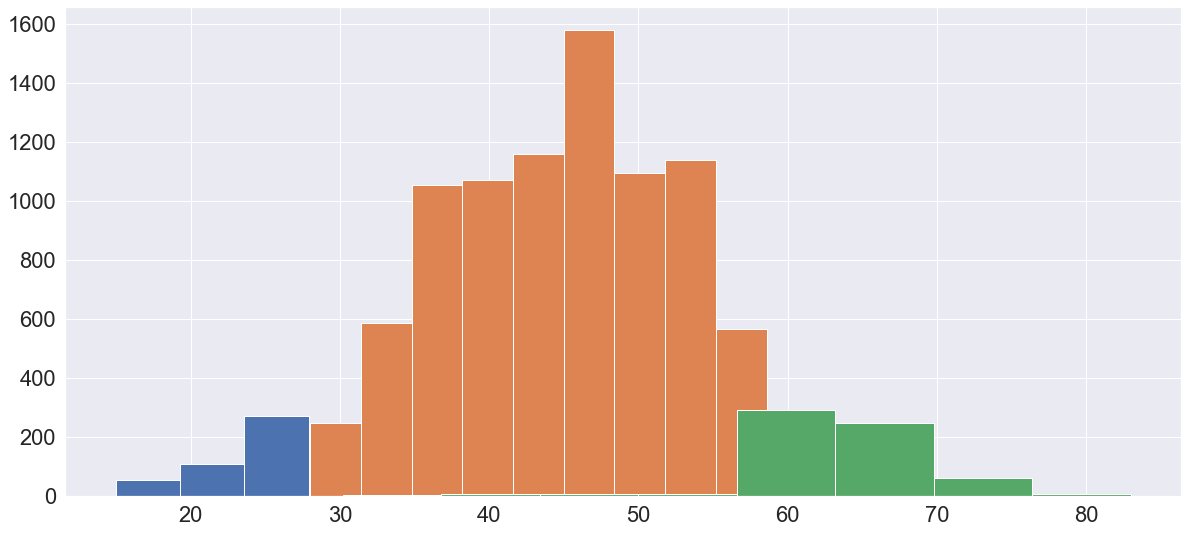

In [4]:
# Гистограмма времени доставки по району в контрольной группе
df.query('experiment_group == "control"') \
    .groupby('district') \
    .delivery_time \
    .hist();

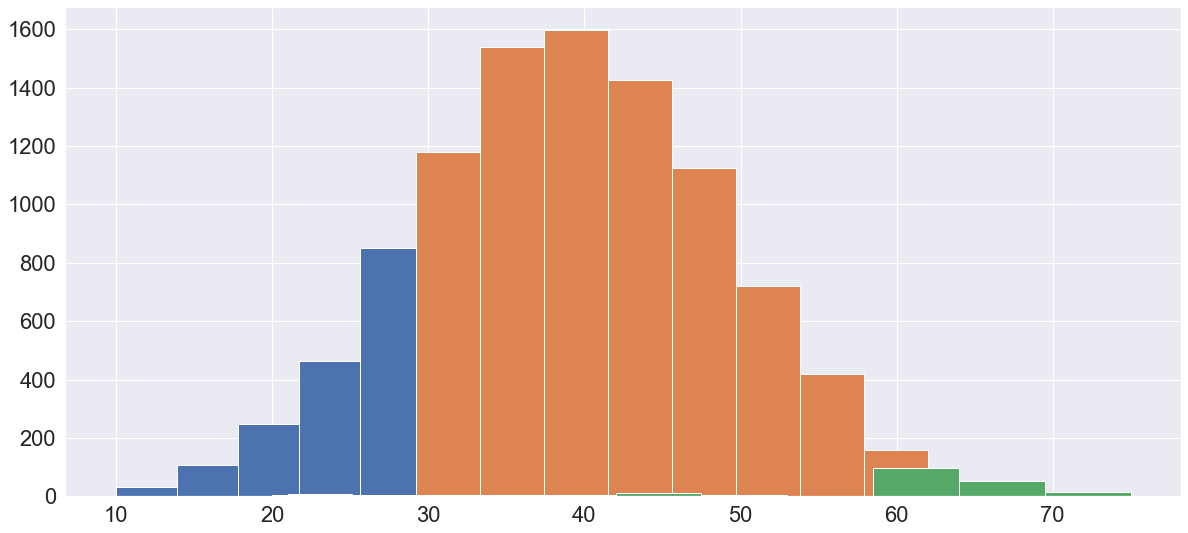

In [5]:
# Гистограмма времени доставки по району в тестовой группе
df.query('experiment_group == "test"')  \
    .groupby('district') \
    .delivery_time \
    .hist();

In [6]:
# Размер тестовой выборки
size_test = df.query('experiment_group == "test"').order_id.count()
size_test

10104

In [7]:
# Размер контрольной выборки
size_control = df.query('experiment_group == "control"').order_id.count()
size_control

10092

<AxesSubplot:>

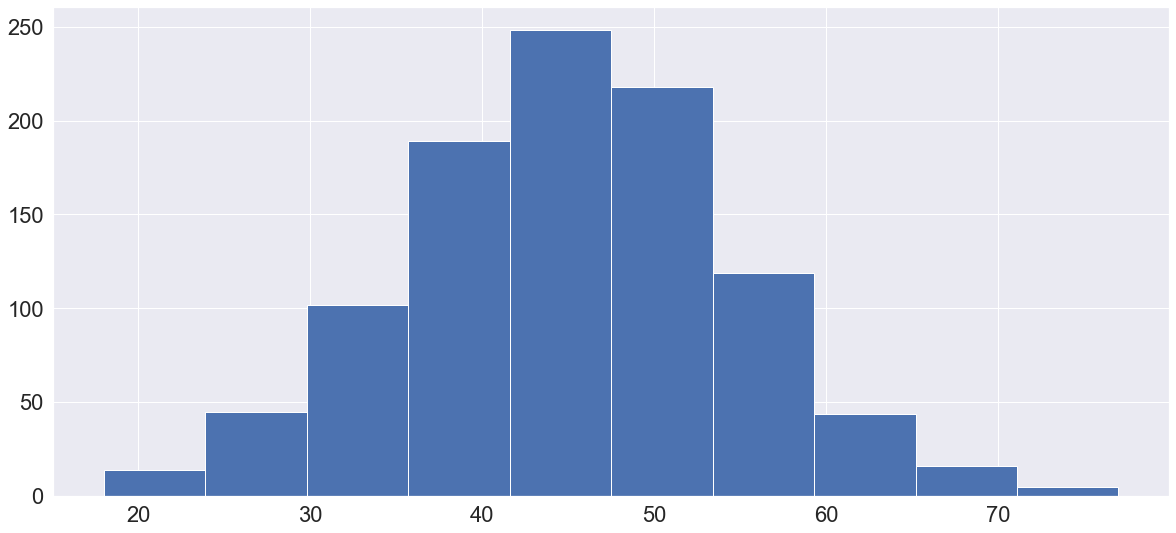

In [10]:
# Семлирование данных, чтобы на больших выборках не получить неверные результаты
df[df['experiment_group'] == 'control']['delivery_time'].sample(1000, random_state=17).hist()

In [19]:
# Стандартное отклонение времени доставки в тестовой группе
std_test = np.std(df[df['experiment_group'] == 'test']['delivery_time'])
std_test

9.882819260031342

In [12]:
# Среднее время доставки в "контроле"
mean_control = df.query('experiment_group ==  "control" ').delivery_time.mean()
mean_control

45.065101070154576

In [13]:
# Стандартное отклонение времени доставки в контрольной группе 
std_control = np.std(df.query('experiment_group ==  "control" ').delivery_time)
std_control

9.989522000652327

In [14]:
# Среднее время в "тесте"
mean_test = df.query('experiment_group ==  "test" ').delivery_time.mean()
mean_test

39.04681314330958

In [24]:
# Применяем тест Стьюдента для сравнения тестовой и конторльной группы
stats.ttest_ind_from_stats(mean_control, std_control, size_control, mean_test,std_test, size_test)

Ttest_indResult(statistic=43.03795771214484, pvalue=0.0)

In [20]:
# На сколько процентов изменилось среднее время доставки в тестовой группе 
np.round((mean_test - mean_control)/mean_control * 100, 2)

-13.35

Итог: раскатываем новый алгоритм на всех, так как среднее время доставки статистически значимо изменилось. Среднее время доставки в тесте меньше, чем в контроле.